In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [3]:
from titanic.config import TRAIN_PATH, TEST_PATH

In [4]:
from titanic.utils import *

In [5]:
train_df = pd.read_csv(TRAIN_PATH)

# TODO: Put the path at the top of the script and replace with variable
test_df = pd.read_csv(TEST_PATH)

In [6]:
summarize_data(train_df)
summarize_data(test_df)

Overview of Data Frame
The first 5 rows of Data Frame
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4

In [7]:
missing_summary(train_df)
missing_summary(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Percent,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [8]:
degree_of_uniformity(train_df)
degree_of_uniformity(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Most frequent item,892,3,"Kelly, Mr. James",male,21.0,0,0,PC 17608,7.75,B57 B59 B63 B66,S
Frequence,1,218,1,266,17,283,324,5,21,3,270
Percent from total,0.239,52.153,0.239,63.636,5.12,67.703,77.512,1.196,5.036,3.297,64.593


In [9]:
unique_value_count(train_df)
unique_value_count(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Uniques,418,3,418,2,79,7,8,363,169,76,3


In [5]:
all_df = all_df(train_df,test_df)
train_df = train_dataframe(train_df)

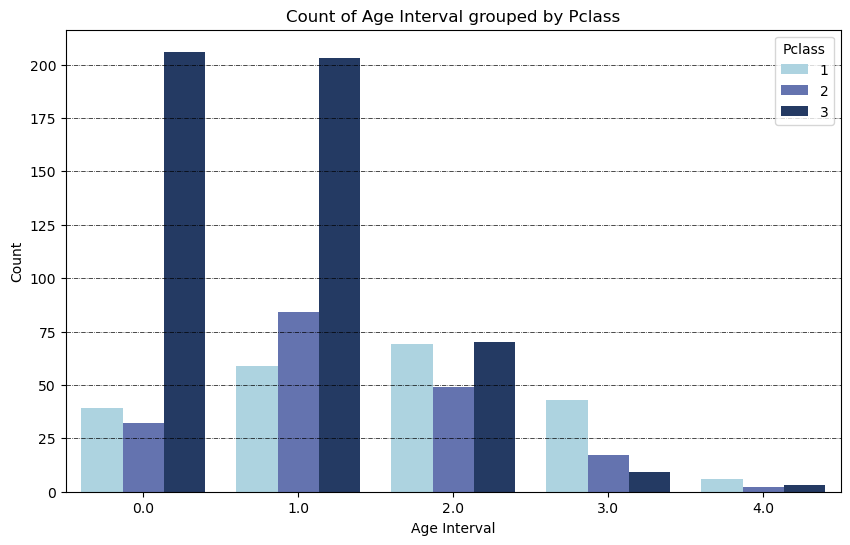

In [6]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
# 设定图表大小
f, ax = plt.subplots(1, 1, figsize=(10, 6))

# 绘制按 "Pclass" 分组的 "Age Interval" 计数图
sns.countplot(x="Age Interval", data=train_df, hue="Pclass", palette=color_list)

# 添加网格和标题
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Count of Age Interval grouped by Pclass")
ax.set_xlabel("Age Interval")
ax.set_ylabel("Count")

# 显示图表
plt.show()

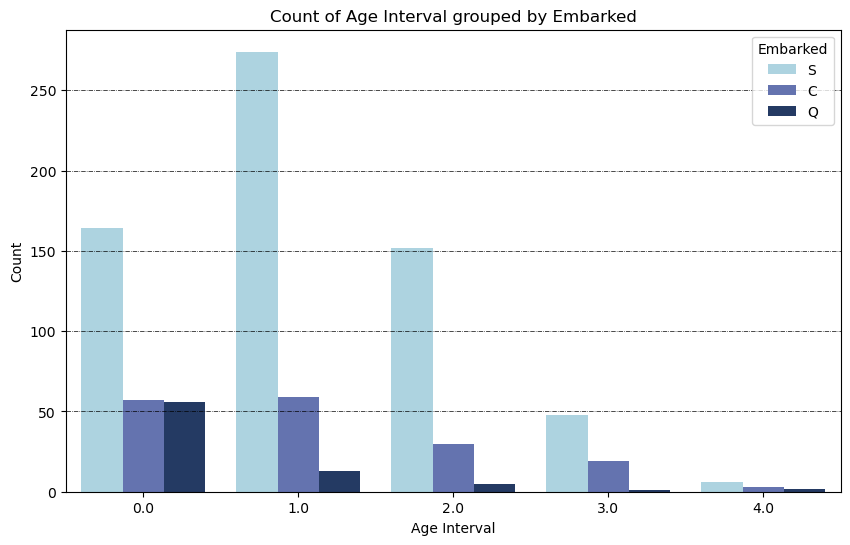

In [7]:
# Set color palette
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]

# Set the figure size
f, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot count of "Age Interval" grouped by "Embarked"
sns.countplot(x="Age Interval", data=train_df, hue="Embarked", palette=color_list)

# Add grid and titles
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Count of Age Interval grouped by Embarked")
ax.set_xlabel("Age Interval")
ax.set_ylabel("Count")

# Show the plot
plt.show()


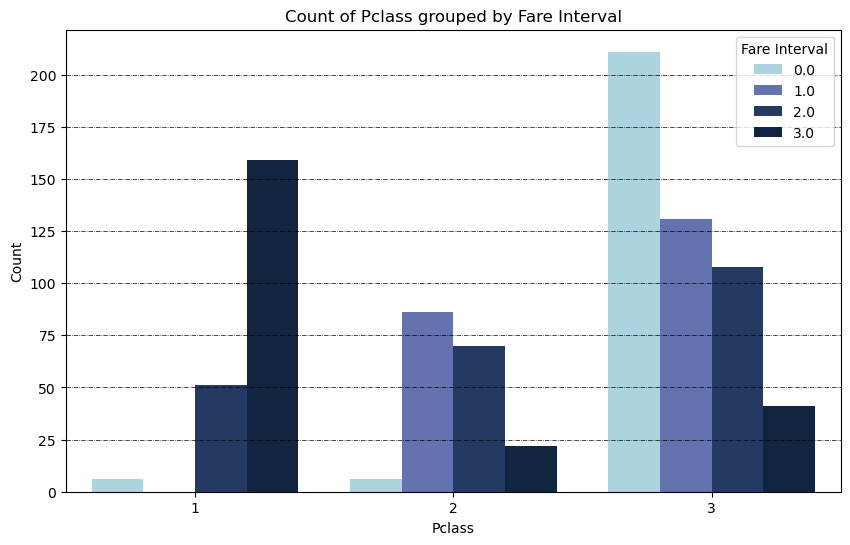

In [8]:
# Set color palette
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]

# Set the figure size
f, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot count of "Pclass" grouped by "Fare Interval"
sns.countplot(x="Pclass", data=train_df, hue="Fare Interval", palette=color_list)

# Add grid and titles
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Count of Pclass grouped by Fare Interval")
ax.set_xlabel("Pclass")
ax.set_ylabel("Count")

# Show the plot
plt.show()


In [9]:
survival_rate = calculate_survival_rate_by_title_sex(train_df)
survival_rate

,Titles,Sex,Survived
0,Master.,male,0.575000
1,Miss.,female,0.702703
2,Mr.,male,0.156673
3,Mrs.,female,0.793651
4,Rare,female,1.000000
5,Rare,male,0.250000


In [10]:
map_sex_column([train_df, test_df])

In [11]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)
predictors = ["Sex", "Pclass"]
target = 'Survived'
train_X, train_Y, valid_X, valid_Y = prepare_training_data(train, valid, predictors, target)

In [12]:
# 训练模型并生成预测结果
preds_tr, preds = train_and_predict(train_X, train_Y, valid_X)


In [13]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.75      0.99      0.86       444
    Survived       0.96      0.47      0.63       268

    accuracy                           0.79       712
   macro avg       0.86      0.73      0.74       712
weighted avg       0.83      0.79      0.77       712



In [14]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.73      0.96      0.83       105
    Survived       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179

